# Imports

In [97]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from ucimlrepo import fetch_ucirepo
import seaborn as sns

# Fetching dataset

In [98]:
glass_identification = fetch_ucirepo(id=42)
dataset = glass_identification.data.original

In [99]:
class_dict = {
    1: "building_windows_float_processed",
    2: "building_windows_non_float_processed",
    3: "vehicle_windows_float_processed",
    4: "vehicle_windows_non_float_processed",
    5: "containers",
    6: "tableware",
    7: "headlamps"
}

# Data exploration

In [100]:
dataset.shape

(214, 11)

In [101]:
dataset.head(20)

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [102]:
dataset.drop(columns=['Id_number'], inplace=True)

In [103]:
dataset.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [104]:
dataset.groupby('Type_of_glass').size()

Type_of_glass
1    70
2    76
3    17
5    13
6     9
7    29
dtype: int64

C:\Users\matig\AppData\Local\Temp\ipykernel_31464\1062197002.py:2: UserWarning: When passing multiple axes, layout keyword is ignored.
  dataset.plot(kind='box', subplots=True, layout=(2, 5), sharex=False, sharey=False, ax=axes)


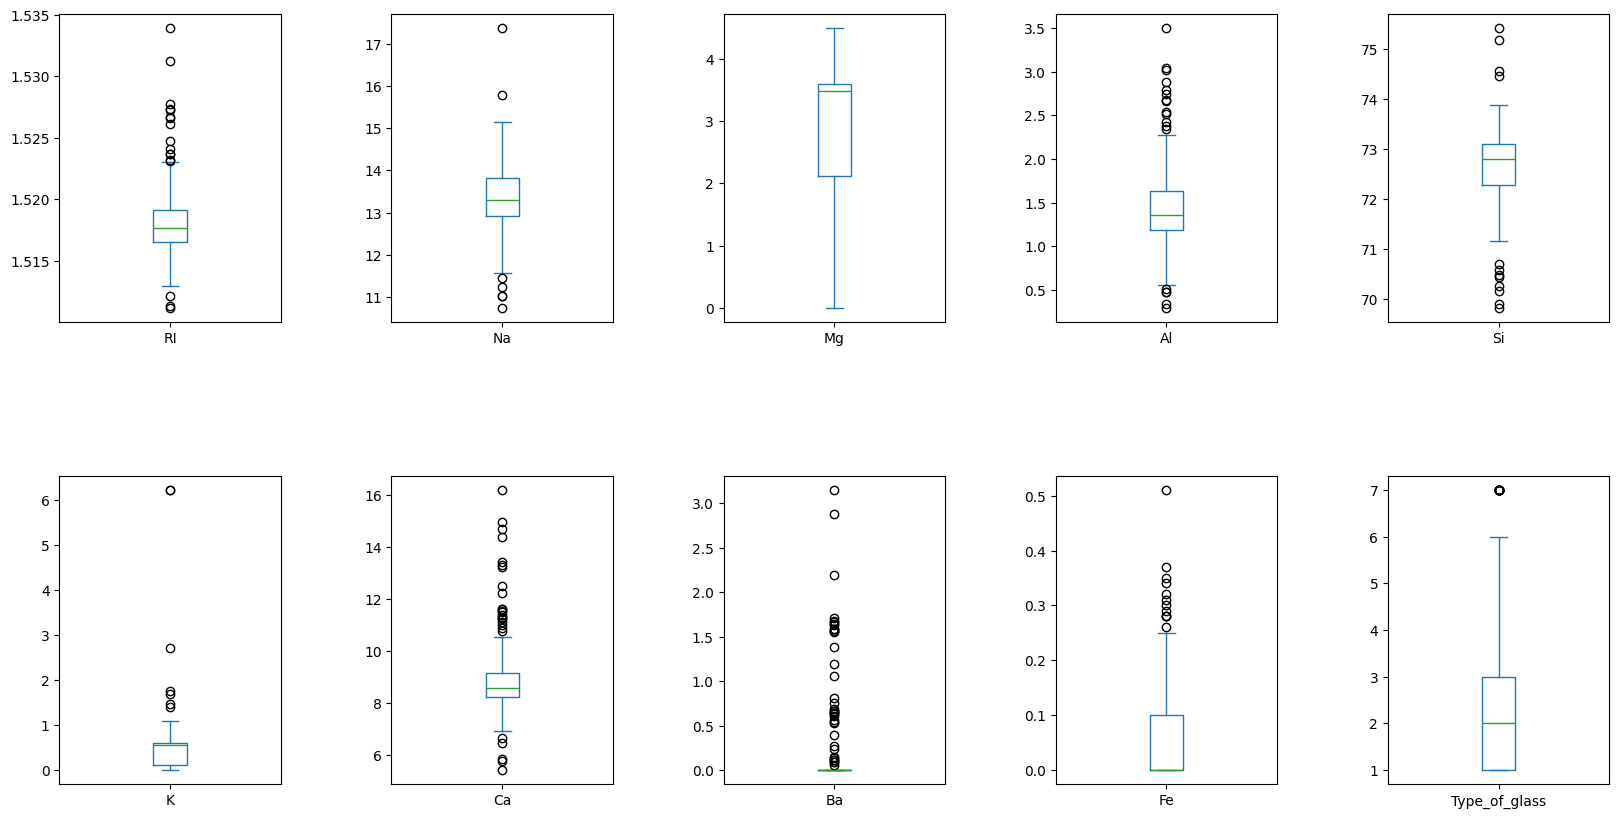

In [105]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))  # Adjust figsize to make subplots larger
dataset.plot(kind='box', subplots=True, layout=(2, 5), sharex=False, sharey=False, ax=axes)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust hspace and wspace as needed

# Show the plot
plt.show()

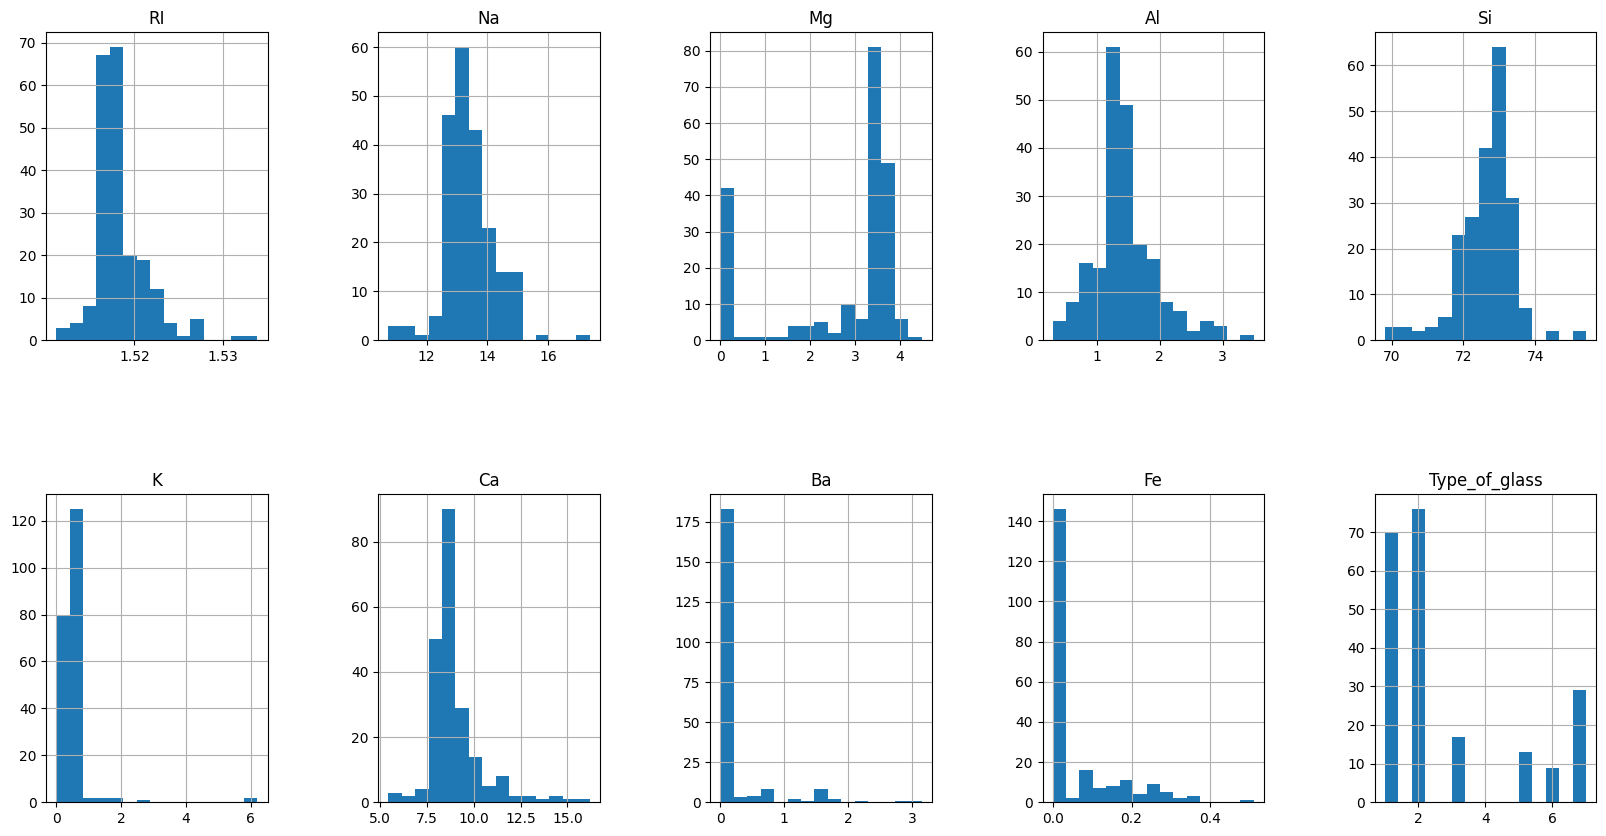

In [106]:
# Create the histograms
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))  # Adjust figsize to make subplots larger
dataset.hist(ax=axes, bins=15)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust hspace and wspace as needed

# Show the plot
plt.show()


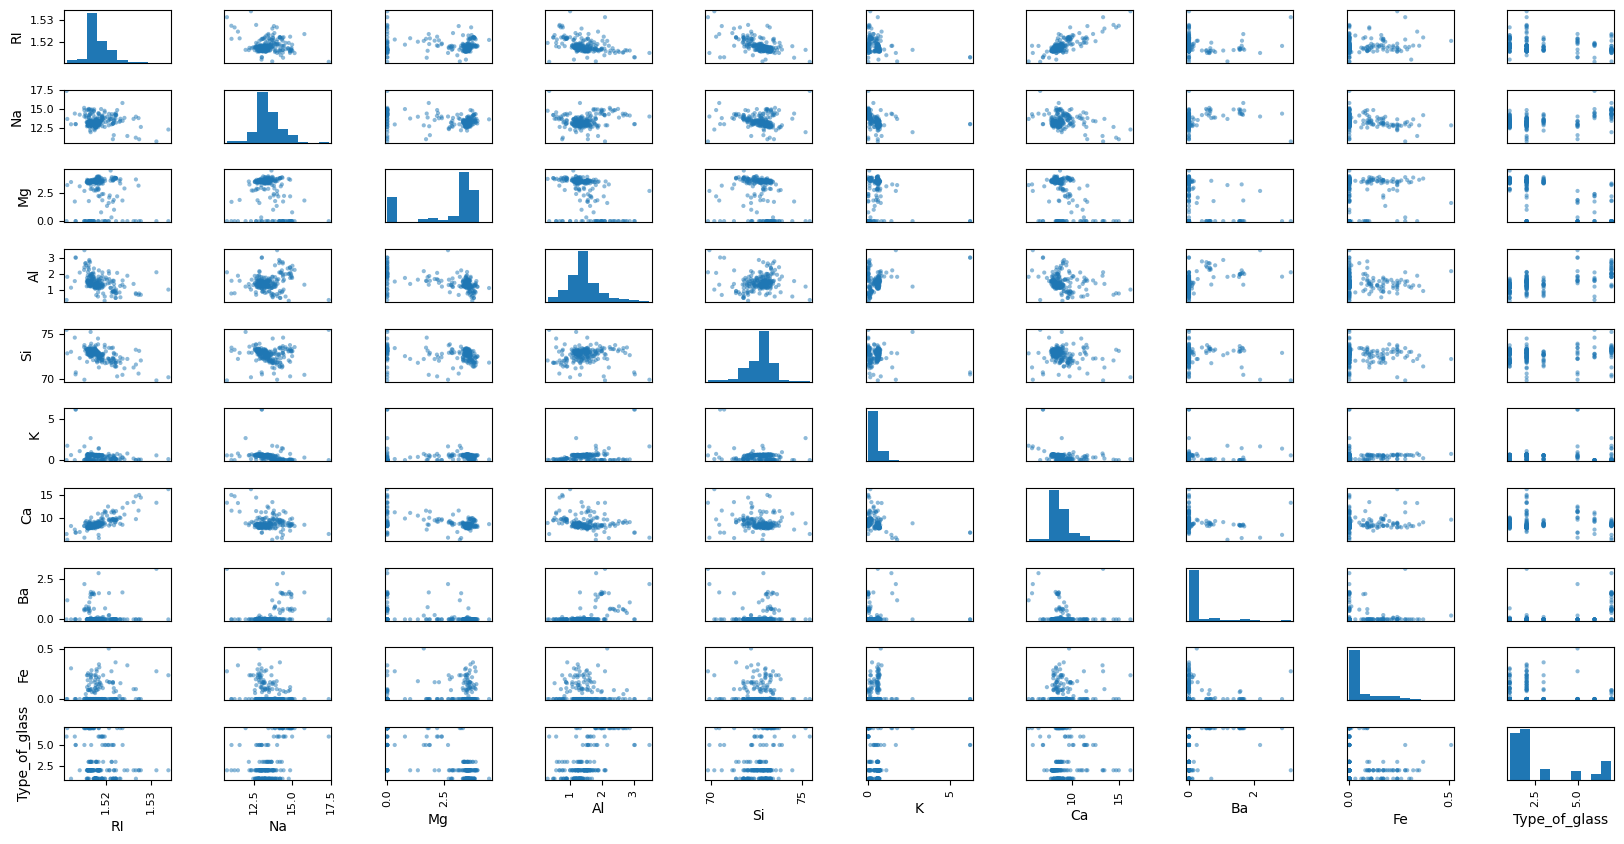

In [107]:
# Create the scatter plot matrix
scatter_matrix_fig = scatter_matrix(dataset, figsize=(20, 10), diagonal='hist')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust hspace and wspace as needed

# Show the plot
plt.show()

# Data preprocessing

In [108]:
x = glass_identification.data.features
y = glass_identification.data.targets

Normalization

In [109]:
normalizer = Normalizer()
x_normalized = normalizer.fit_transform(x)
x_normalized = pandas.DataFrame(x_normalized, columns=x.columns, index=x.index)

In [110]:
x_normalized.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.020373,0.179893,0.036079,0.019389,0.974684,0.006695,0.120183,0.002353,0.000766
std,0.000214,0.010981,0.019395,0.006734,0.002748,0.008941,0.019227,0.006722,0.001311
min,0.019452,0.146107,0.000000,0.003909,0.960172,0.000000,0.072963,0.000000,0.000000
25%,0.020258,0.173025,0.028478,0.015932,0.973149,0.001663,0.110382,0.000000,0.000000
50%,0.020338,0.178892,0.046603,0.018337,0.975522,0.007438,0.115211,0.000000,0.000000
75%,0.020479,0.186234,0.048366,0.021840,0.976717,0.008155,0.124221,0.000000,0.001343
max,0.021270,0.223717,0.060884,0.048796,0.979958,0.085825,0.221568,0.043756,0.006890


Scaling

In [111]:
scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)
x_scaled = pandas.DataFrame(x_scaled, columns=x.columns, index=x.index)

In [112]:
x_scaled.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.877034e-14,2.191393e-15,-1.328117e-16,-2.988264e-16,9.525091e-16,3.527811e-17,-3.154278e-16,-6.640586e-17,-3.735330e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


In [113]:
x_datasets = {
    "original": x,
    "normalized": x_normalized,
    "scaled": x_scaled
}

# Train/test split

In [114]:
seed = 42
test_size = 0.2

data_splited = {key : train_test_split(x_set, y, test_size=test_size, random_state=seed, stratify=y) for key, x_set in x_datasets.items()}


# Classifiers comparison

In [115]:
classifers = [
    (GaussianNB, [
        {'var_smoothing': 1e-9},
        {'var_smoothing': 1e-8},
        {'var_smoothing': 1e-10}
    ]),
    (DecisionTreeClassifier, [
        {
            'class_weight': 'balanced',
            'criterion': 'gini',
            'splitter': 'best',
            'max_depth': 10,
            'min_samples_split': 2,
            'min_samples_leaf': 1,
            'max_features': None,
            'random_state': seed
        },
        {
            'class_weight': 'balanced',
            'criterion': 'entropy',
            'splitter': 'random',
            'max_depth': 5,
            'min_samples_split': 4,
            'min_samples_leaf': 2,
            'max_features': 'sqrt',
            'random_state': seed
        },
        {
            'class_weight': 'balanced',
            'criterion': 'gini',
            'splitter': 'best',
            'max_depth': None,
            'min_samples_split': 10,
            'min_samples_leaf': 4,
            'max_features': 'log2',
            'random_state': seed
        }
    ])
]

In [116]:
results = []

for classifier_type, param_configurations in classifers:
    for params in param_configurations:
        for key, (x_train, x_test, y_train, y_test) in data_splited.items():
            classifier = classifier_type(**params)
            classifier.fit(x_train, y_train)
            predictions = classifier.predict(x_test)
            
            accuracy = accuracy_score(y_test, predictions)
            precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
            recall = recall_score(y_test, predictions, average='weighted')
            f1 = f1_score(y_test, predictions, average='weighted')
            conf_matrix = confusion_matrix(y_test, predictions)
            class_report = classification_report(y_test, predictions, output_dict=True, zero_division=0)
            
            result = {
                'classifier_type': classifier_type.__name__,
                'params': params,
                'key': key,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1_score': f1,
                'confusion_matrix': conf_matrix,
                'classification_report': class_report

            }
            
            results.append(result)

results_df = pandas.DataFrame(results)
results_df

d:\Studia\Semestr 6\Sztuczna Inteligencja\machine_learning\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Studia\Semestr 6\Sztuczna Inteligencja\machine_learning\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Studia\Semestr 6\Sztuczna Inteligencja\machine_learning\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Studia\Semestr 6\Sztuczna Inteligencja\machine_learning\.venv\Lib\site-packages

,classifier_type,params,key,accuracy,precision,recall,f1_score,confusion_matrix,classification_report
0,GaussianNB,{'var_smoothing': 1e-09},original,0.511628,0.476744,0.511628,0.450592,"[[12, 1, 1, 0, 0, 0], [9, 2, 1, 0, 2, 1], [3, ...","{'1': {'precision': 0.5, 'recall': 0.857142857..."
1,GaussianNB,{'var_smoothing': 1e-09},normalized,0.511628,0.476744,0.511628,0.450592,"[[12, 1, 1, 0, 0, 0], [9, 2, 1, 0, 2, 1], [3, ...","{'1': {'precision': 0.5, 'recall': 0.857142857..."
2,GaussianNB,{'var_smoothing': 1e-09},scaled,0.511628,0.476744,0.511628,0.450592,"[[12, 1, 1, 0, 0, 0], [9, 2, 1, 0, 2, 1], [3, ...","{'1': {'precision': 0.5, 'recall': 0.857142857..."
3,GaussianNB,{'var_smoothing': 1e-08},original,0.511628,0.476744,0.511628,0.450592,"[[12, 1, 1, 0, 0, 0], [9, 2, 1, 0, 2, 1], [3, ...","{'1': {'precision': 0.5, 'recall': 0.857142857..."
4,GaussianNB,{'var_smoothing': 1e-08},normalized,0.511628,0.476744,0.511628,0.450592,"[[12, 1, 1, 0, 0, 0], [9, 2, 1, 0, 2, 1], [3, ...","{'1': {'precision': 0.5, 'recall': 0.857142857..."
5,GaussianNB,{'var_smoothing': 1e-08},scaled,0.511628,0.476744,0.511628,0.450592,"[[12, 1, 1, 0, 0, 0], [9, 2, 1, 0, 2, 1], [3, ...","{'1': {'precision': 0.5, 'recall': 0.857142857..."
6,GaussianNB,{'var_smoothing': 1e-10},original,0.511628,0.476744,0.511628,0.450592,"[[12, 1, 1, 0, 0, 0], [9, 2, 1, 0, 2, 1], [3, ...","{'1': {'precision': 0.5, 'recall': 0.857142857..."
7,GaussianNB,{'var_smoothing': 1e-10},normalized,0.511628,0.476744,0.511628,0.450592,"[[12, 1, 1, 0, 0, 0], [9, 2, 1, 0, 2, 1], [3, ...","{'1': {'precision': 0.5, 'recall': 0.857142857..."
8,GaussianNB,{'var_smoothing': 1e-10},scaled,0.511628,0.476744,0.511628,0.450592,"[[12, 1, 1, 0, 0, 0], [9, 2, 1, 0, 2, 1], [3, ...","{'1': {'precision': 0.5, 'recall': 0.857142857..."
9,DecisionTreeClassifier,"{'class_weight': 'balanced', 'criterion': 'gin...",original,0.674419,0.711296,0.674419,0.677582,"[[10, 2, 2, 0, 0, 0], [2, 8, 2, 1, 1, 1], [0, ...","{'1': {'precision': 0.8333333333333334, 'recal..."


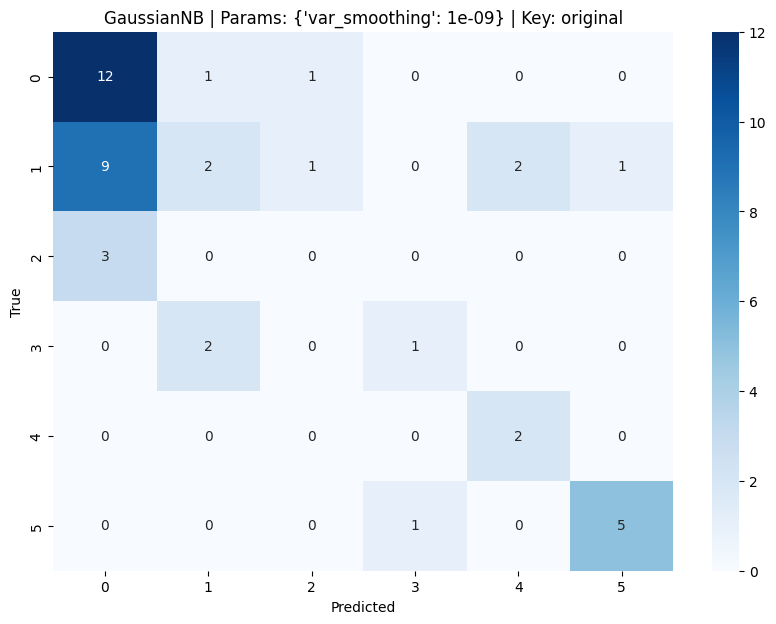

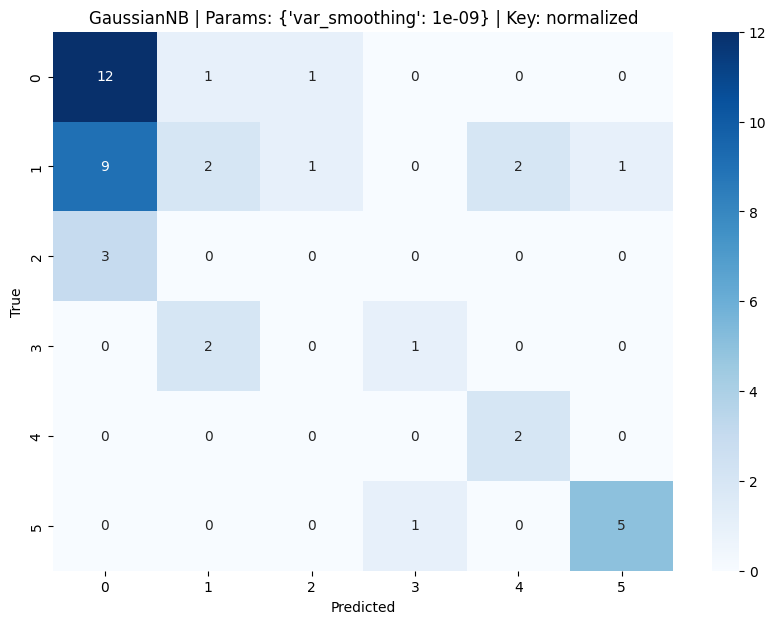

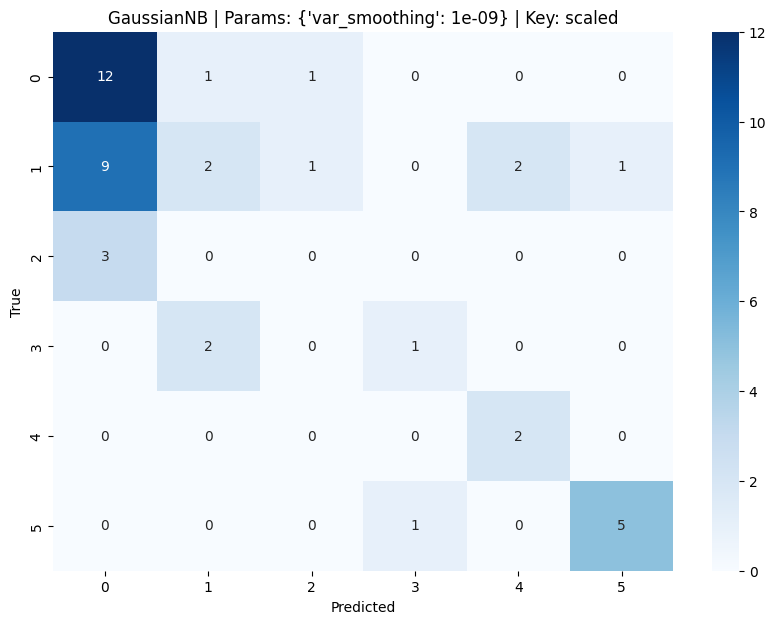

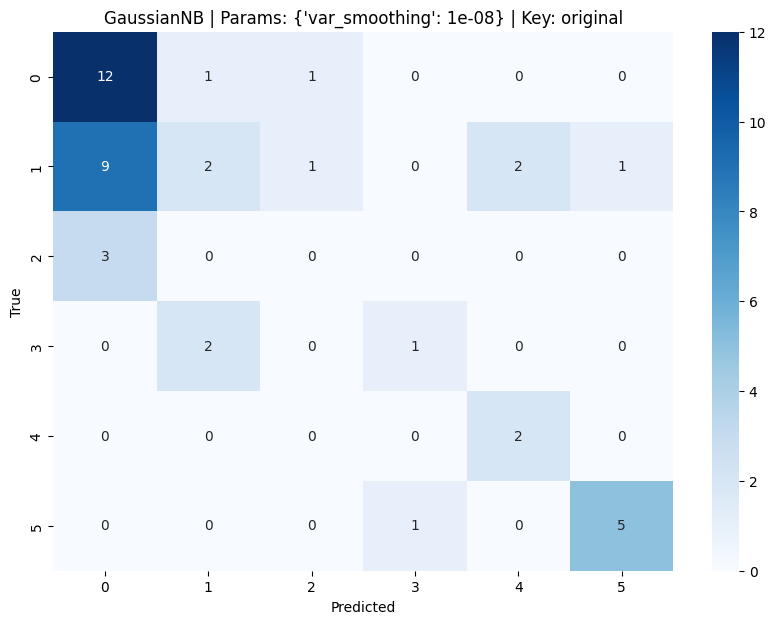

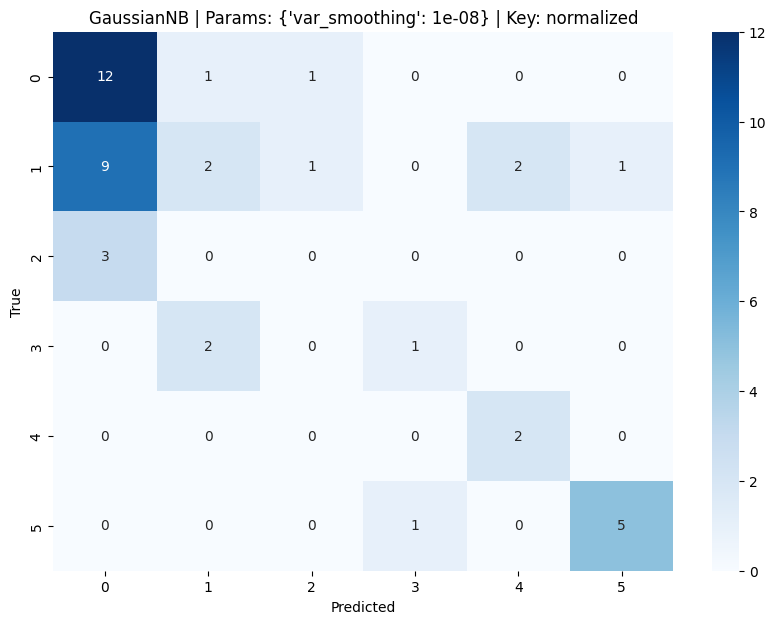

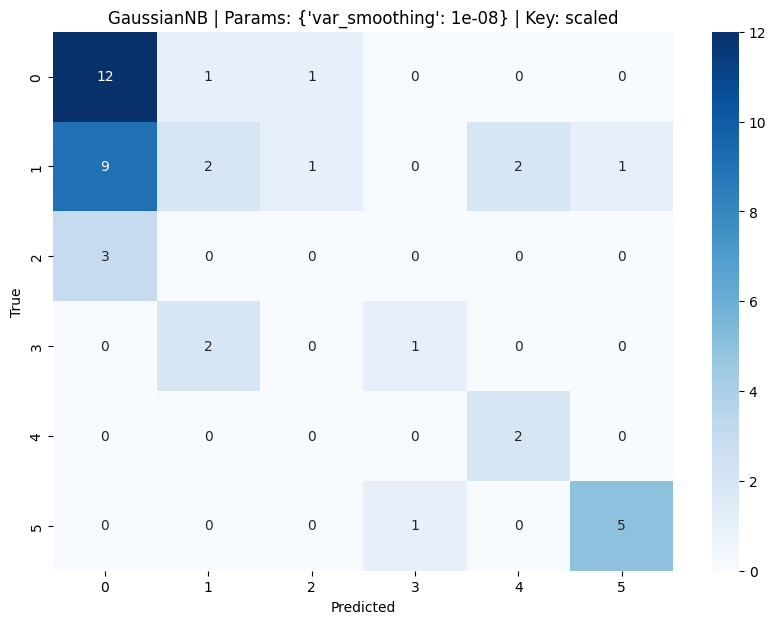

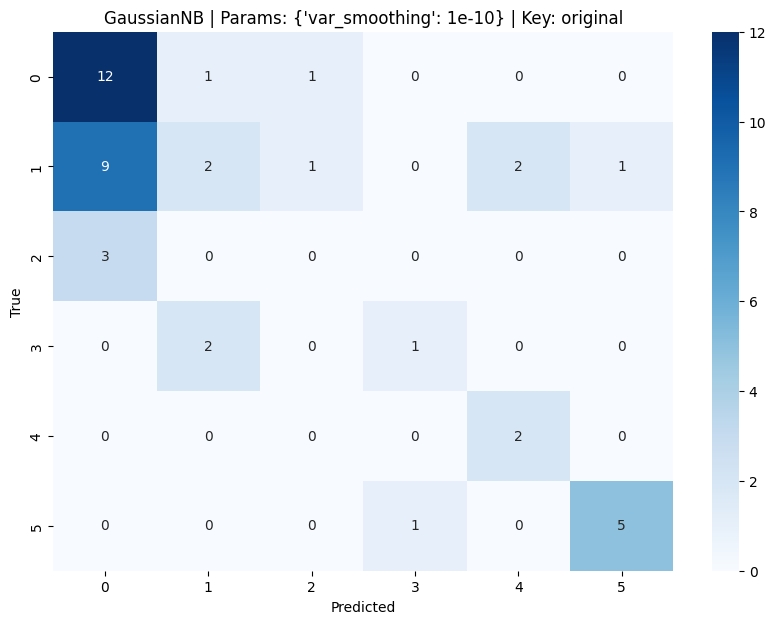

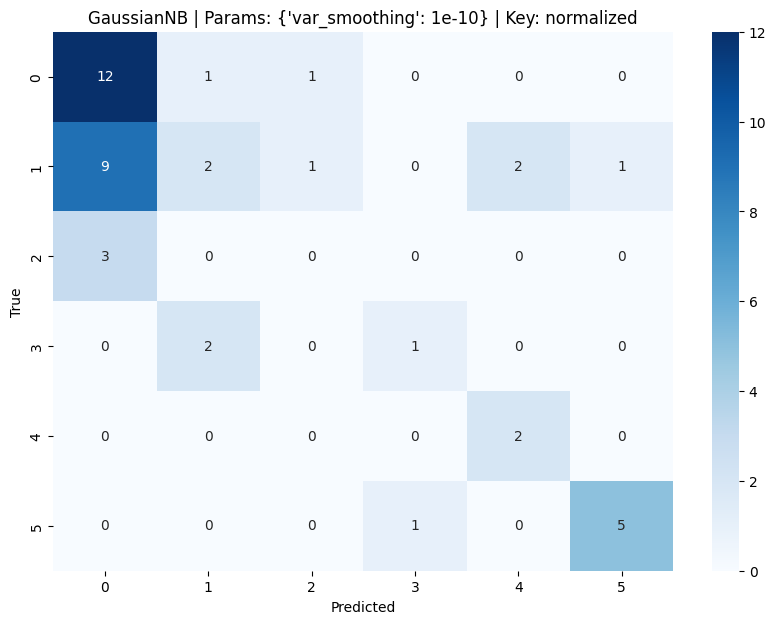

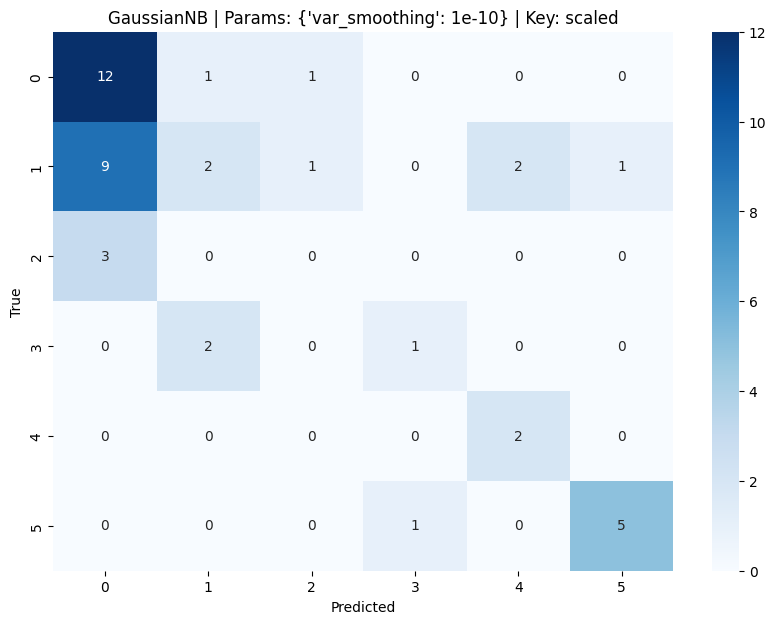

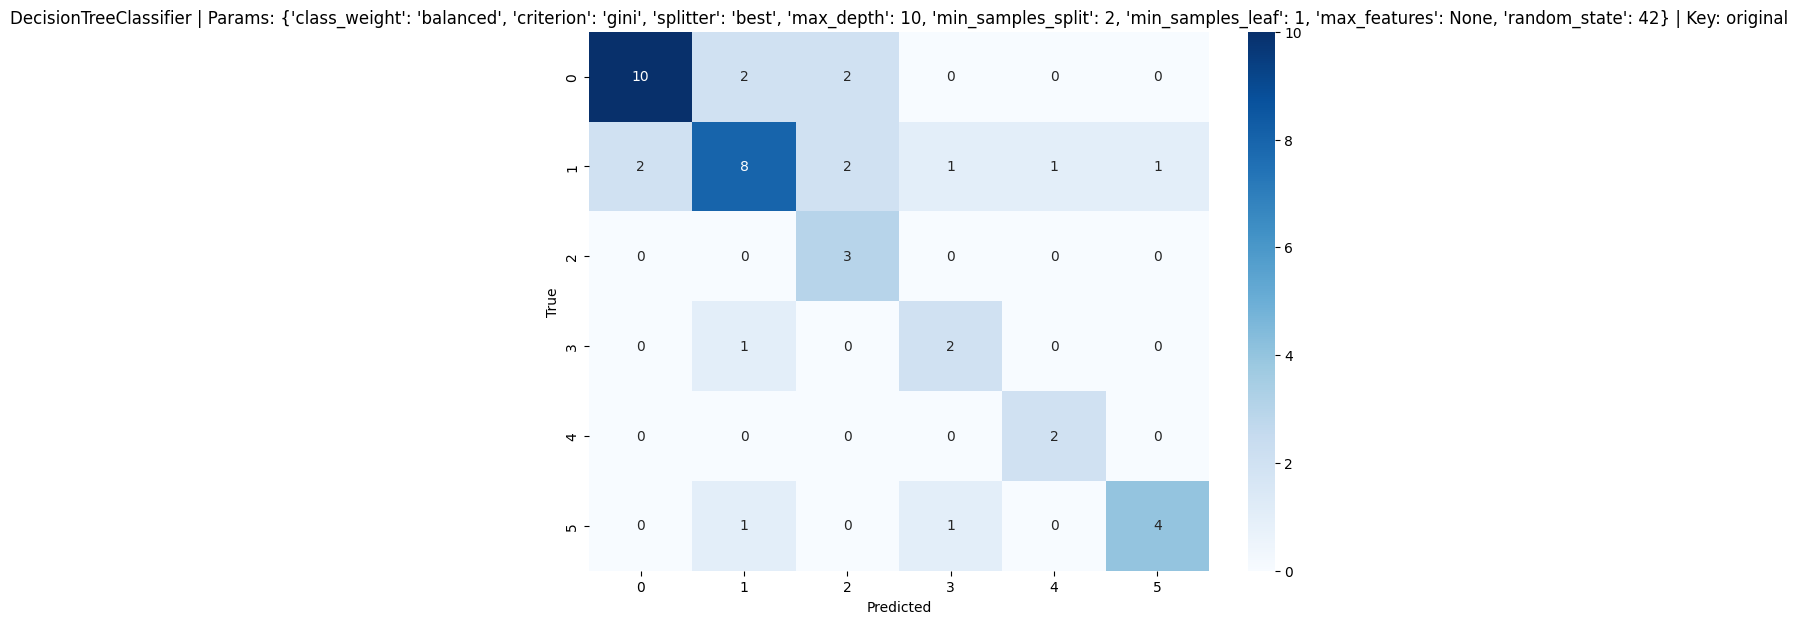

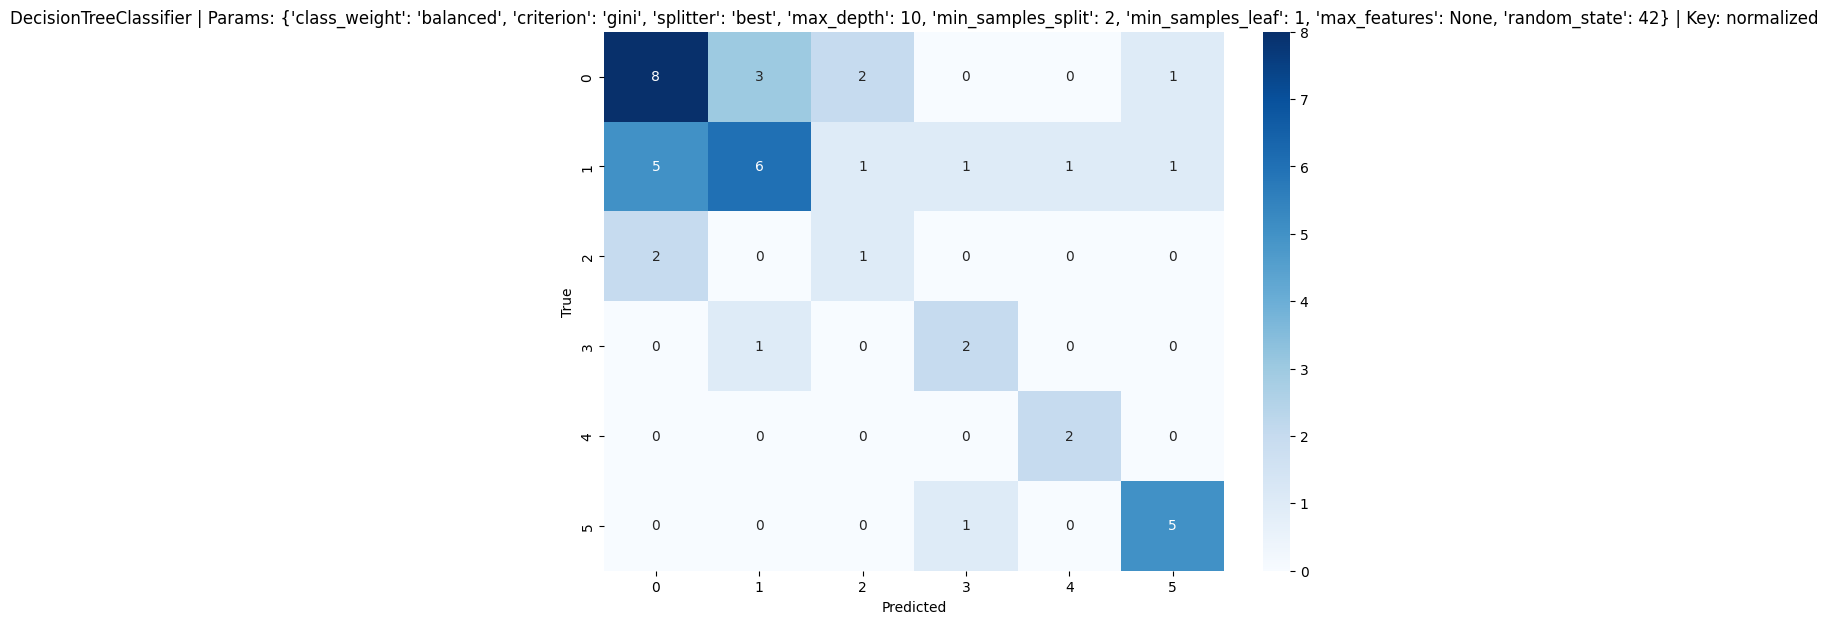

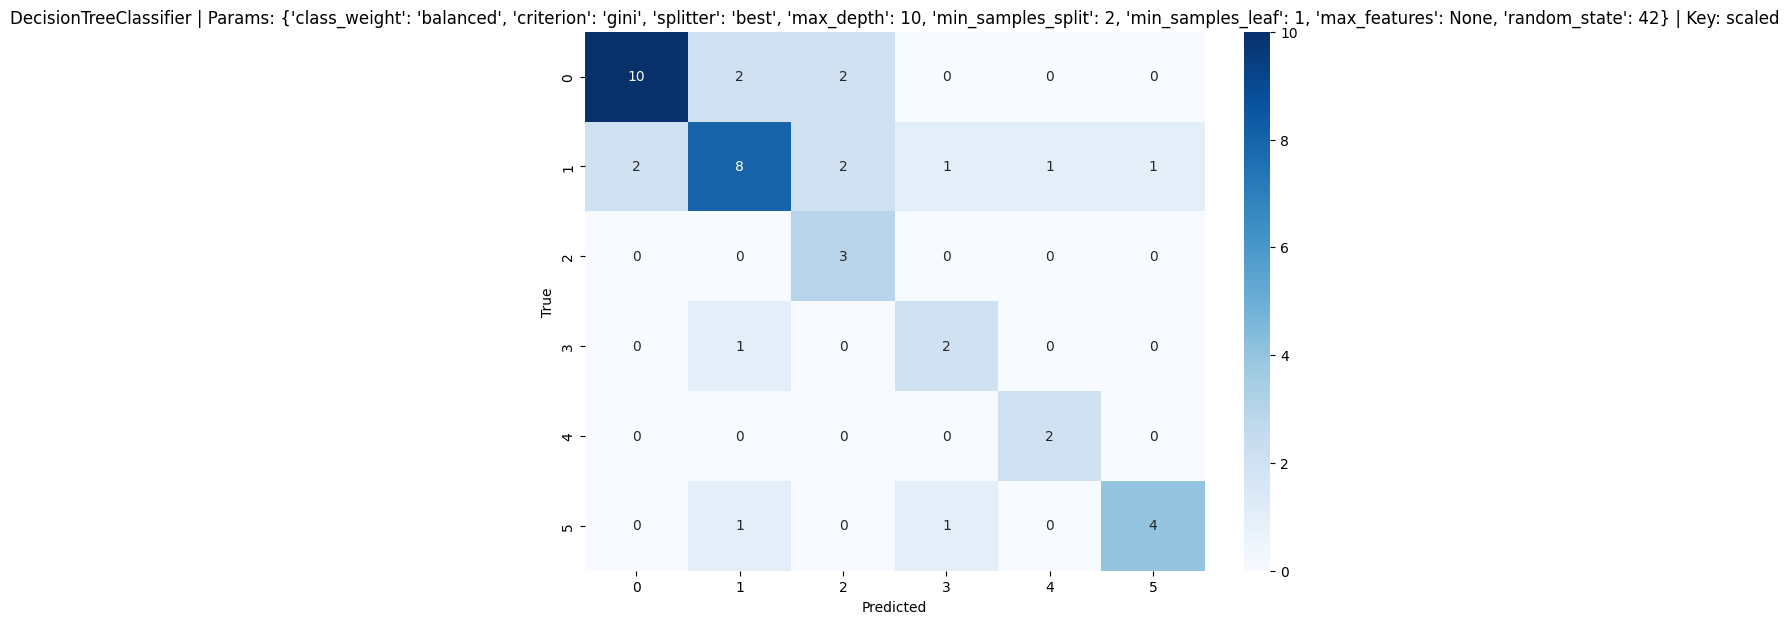

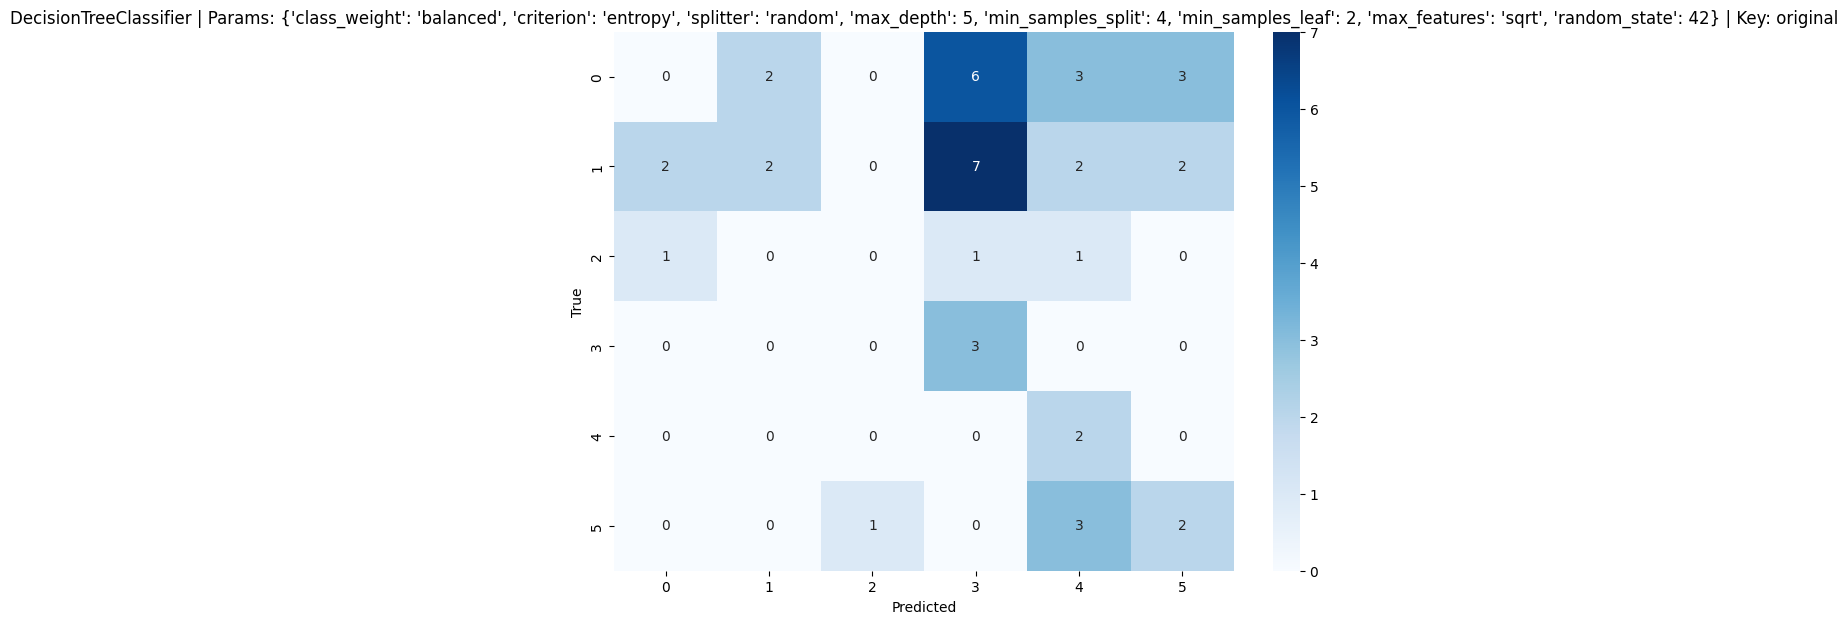

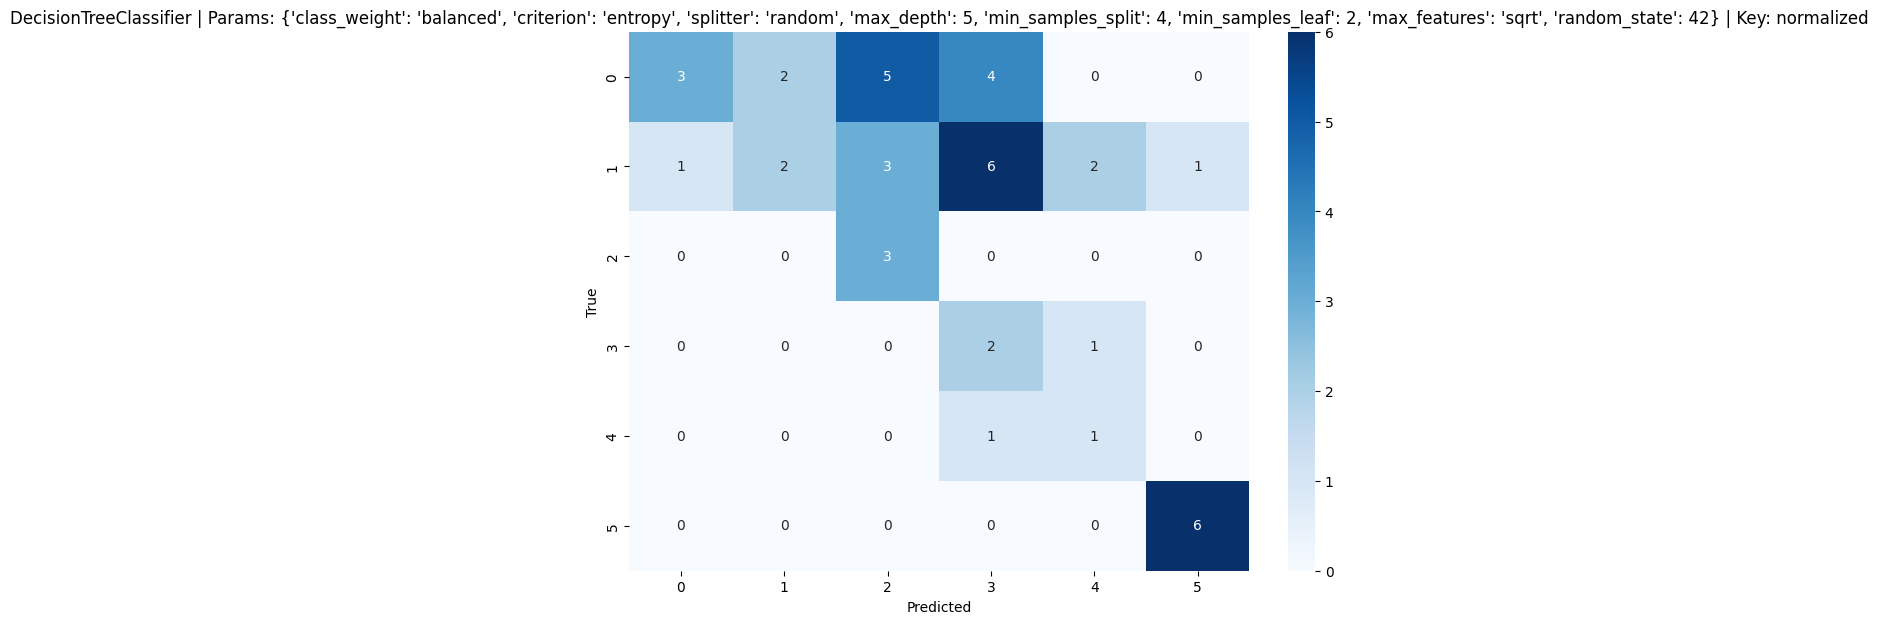

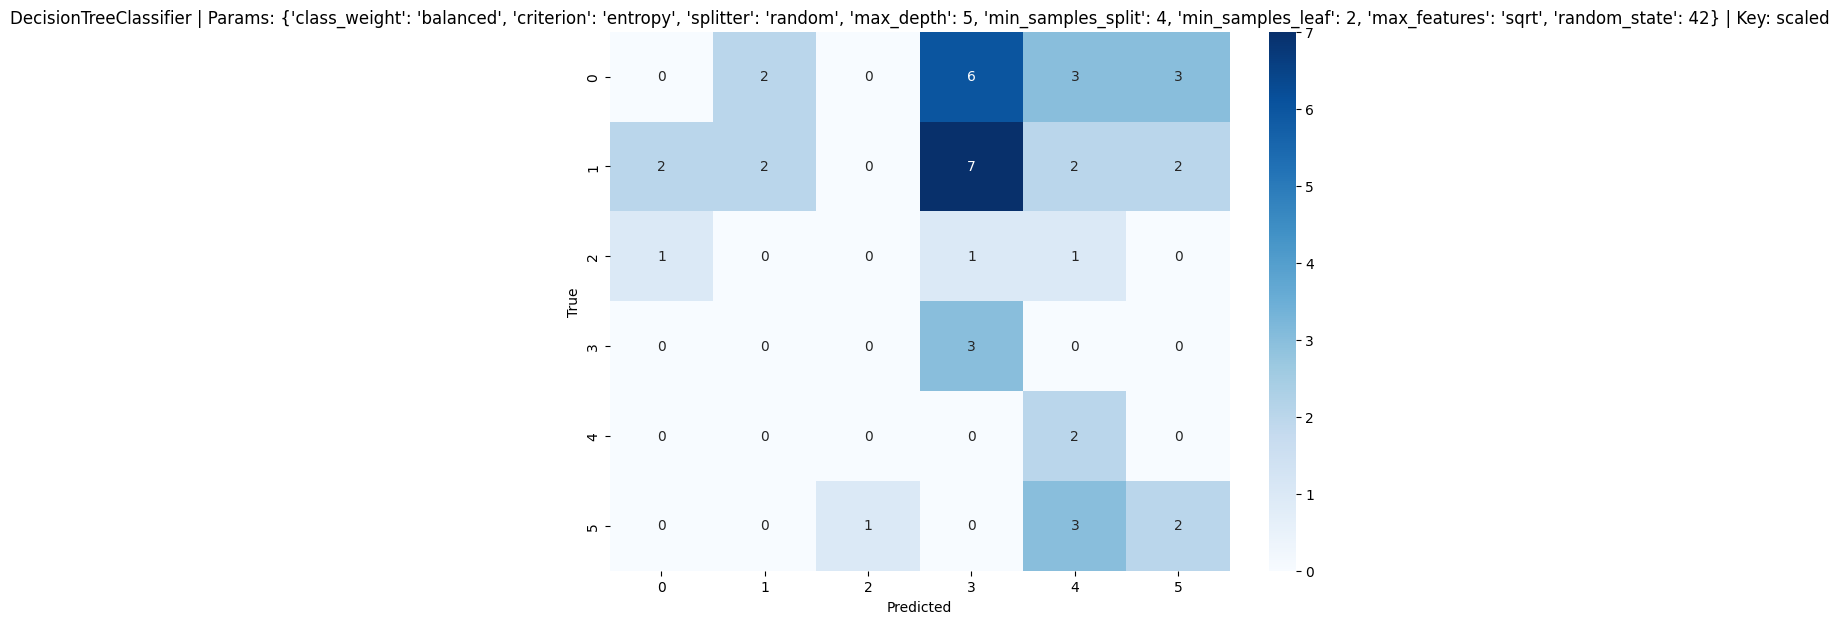

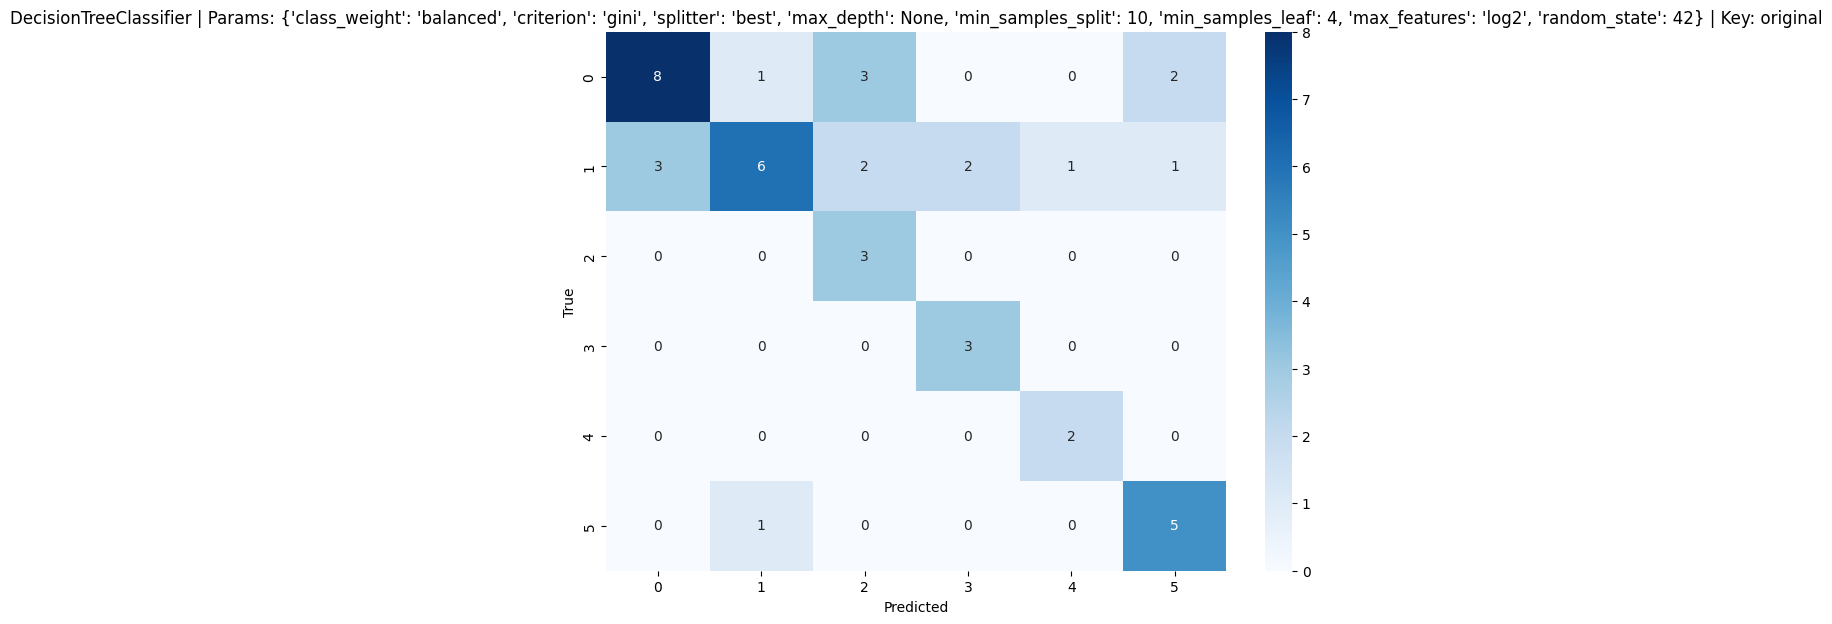

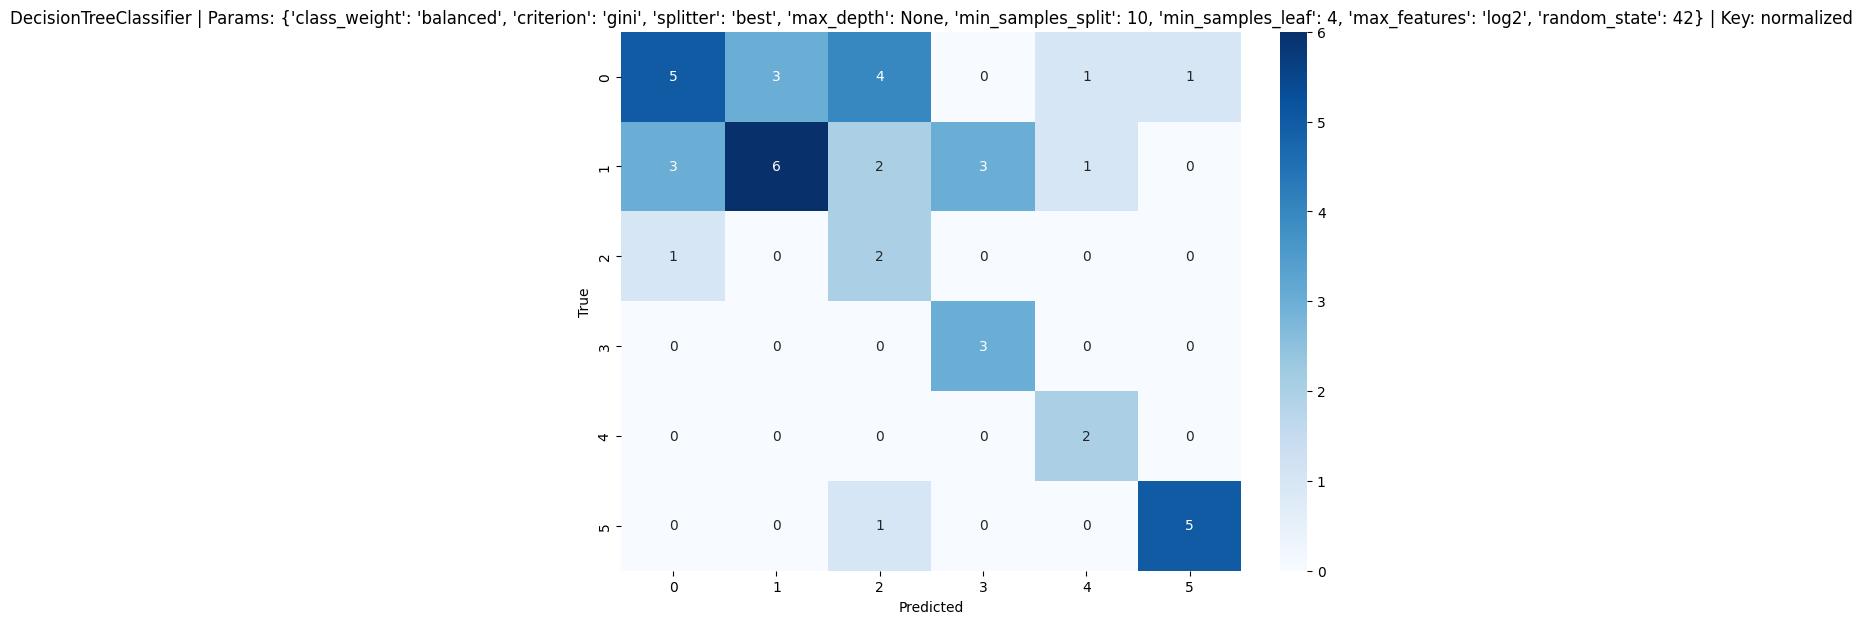

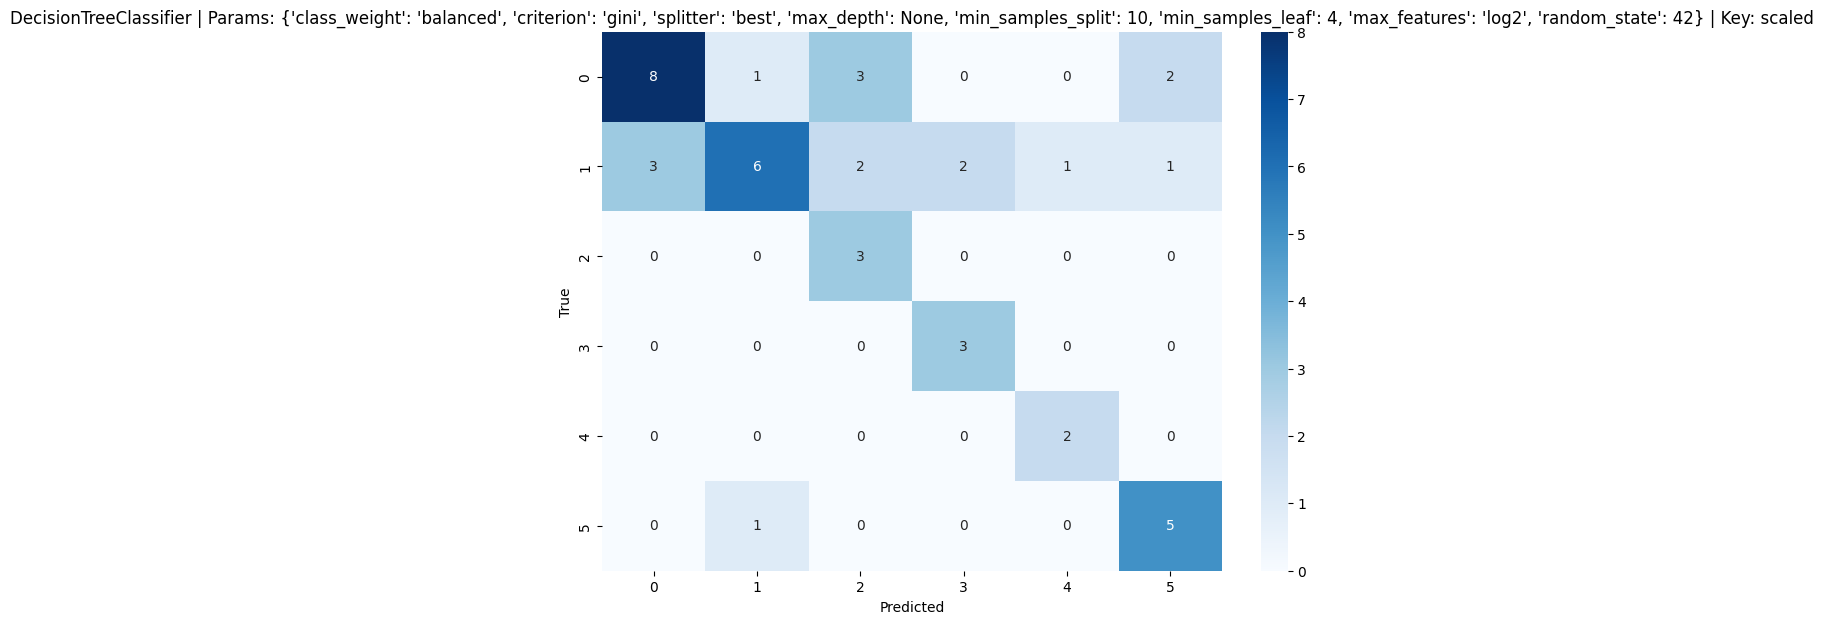

In [117]:
# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrices
for result in results:
    title = f"{result['classifier_type']} | Params: {result['params']} | Key: {result['key']}"
    plot_confusion_matrix(result['confusion_matrix'], title)